# **1. Data Preprocessing for Clustering**






| Name | Role / Task |
|-----------|----------------|
| Reema Almunasser | Integration & Insights |
| Sadeem Alsayari | Elbow Method & Choosing K |
|   Leen Alohali  | Data preprocessing |
|  Noof Alkhalifa   | Evaluation |
|  Sara Alshuwaier | Applying K-Means Clustering |

## **Objective**

Before applying clustering, we prepare the dataset so that distance-based algorithms (such as K-Means) can work correctly.
This includes removing non-clustering columns, keeping only numeric operational and sensor features, and scaling them to a comparable range.

## **1.1 Load the cleaned dataset**

In [1]:
# Load cleaned dataset
import pandas as pd

from google.colab import files
uploaded = files.upload()

DATA_PATH = "logistics_dataset_with_maintenance_required_cleaned.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
df.head()


Saving logistics_dataset_with_maintenance_required_cleaned.csv to logistics_dataset_with_maintenance_required_cleaned.csv
Dataset shape: (11586, 48)


,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Usage_Hours,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Cost,Engine_Temperature,Tire_Pressure,...,Make_volvo,Model_fh,Model_semi,Model_silverado,Service_Year,Service_Month,Service_DayOfWeek,Days_Since_Last_Service,Recent_Service_90d,Load_Utilization
0,1,ford f150,1.000000,0.018946,0.034069,0.041134,2023-04-09,0.001723,0.0,0.0,...,0,0,0,0,2023,4,6,448,0,1.000000
1,2,volvo fh,0.588235,0.381747,0.034689,0.027919,2023-07-20,0.028125,0.0,0.0,...,1,1,0,0,2023,7,3,346,0,0.804853
2,3,chevy silverado,1.000000,0.149460,0.013116,0.013731,2023-03-17,0.052977,0.0,1.0,...,0,0,0,1,2023,3,4,471,0,1.000000
3,4,chevy silverado,0.352941,0.106313,0.071867,0.086002,2024-05-01,0.058339,0.0,0.0,...,0,0,0,1,2024,5,2,60,1,1.000000
4,5,ford f150,0.529412,0.090763,0.274337,0.299720,2023-11-15,0.064227,0.0,1.0,...,0,0,0,0,2023,11,2,228,0,1.000000


## **1.2 Remove label and identifier columns**

We remove columns that should not be used in clustering.

* **Maintenance_Required** is the target label used in supervised learning.

* **Vehicle_ID** is only an identifier and carries no behavioral meaning.

In [2]:
#Remove label and ID
cols_to_remove = ["Maintenance_Required", "Vehicle_ID"]
cluster_df = df.drop(columns=cols_to_remove, errors="ignore")

print("Shape after removing columns:", cluster_df.shape)
cluster_df.head()


Shape after removing columns: (11586, 46)


,Make_and_Model,Year_of_Manufacture,Usage_Hours,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Cost,Engine_Temperature,Tire_Pressure,Fuel_Consumption,...,Make_volvo,Model_fh,Model_semi,Model_silverado,Service_Year,Service_Month,Service_DayOfWeek,Days_Since_Last_Service,Recent_Service_90d,Load_Utilization
0,ford f150,1.000000,0.018946,0.034069,0.041134,2023-04-09,0.001723,0.0,0.0,0.000000,...,0,0,0,0,2023,4,6,448,0,1.000000
1,volvo fh,0.588235,0.381747,0.034689,0.027919,2023-07-20,0.028125,0.0,0.0,0.000000,...,1,1,0,0,2023,7,3,346,0,0.804853
2,chevy silverado,1.000000,0.149460,0.013116,0.013731,2023-03-17,0.052977,0.0,1.0,0.533793,...,0,0,0,1,2023,3,4,471,0,1.000000
3,chevy silverado,0.352941,0.106313,0.071867,0.086002,2024-05-01,0.058339,0.0,0.0,0.000000,...,0,0,0,1,2024,5,2,60,1,1.000000
4,ford f150,0.529412,0.090763,0.274337,0.299720,2023-11-15,0.064227,0.0,1.0,0.000000,...,0,0,0,0,2023,11,2,228,0,1.000000


This prevents data leakage and ensures clusters are formed purely from operational behavior.

## **1.3 Keep only numeric features**
K-Means requires numeric features because it uses distance calculations.

In [3]:
# Select numeric features for clustering
import numpy as np

numeric_cols = cluster_df.select_dtypes(include=[np.number]).columns
cluster_df = cluster_df[numeric_cols]

print("Numeric features used:", len(numeric_cols))
cluster_df.head()

Numeric features used: 44


,Year_of_Manufacture,Usage_Hours,Load_Capacity,Actual_Load,Maintenance_Cost,Engine_Temperature,Tire_Pressure,Fuel_Consumption,Battery_Status,Vibration_Levels,...,Make_volvo,Model_fh,Model_semi,Model_silverado,Service_Year,Service_Month,Service_DayOfWeek,Days_Since_Last_Service,Recent_Service_90d,Load_Utilization
0,1.000000,0.018946,0.034069,0.041134,0.001723,0.0,0.0,0.000000,0.0,0.050954,...,0,0,0,0,2023,4,6,448,0,1.000000
1,0.588235,0.381747,0.034689,0.027919,0.028125,0.0,0.0,0.000000,0.0,0.019282,...,1,1,0,0,2023,7,3,346,0,0.804853
2,1.000000,0.149460,0.013116,0.013731,0.052977,0.0,1.0,0.533793,1.0,0.113079,...,0,0,0,1,2023,3,4,471,0,1.000000
3,0.352941,0.106313,0.071867,0.086002,0.058339,0.0,0.0,0.000000,0.0,0.068049,...,0,0,0,1,2024,5,2,60,1,1.000000
4,0.529412,0.090763,0.274337,0.299720,0.064227,0.0,1.0,0.000000,1.0,0.089422,...,0,0,0,0,2023,11,2,228,0,1.000000


We focus on features such as engine temperature, tire pressure, vibration, oil quality, and usage hours.

## **1.4 Handling Missing Data**

The dataset contained missing values (NaNs), which K-Means cannot process.

To fix this:

* A median imputation strategy was applied.

* Each missing value was replaced with the median of its column.

This prevents data loss and keeps the dataset statistically stable.

In [4]:
from sklearn.impute import SimpleImputer

# Median imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
cluster_df = pd.DataFrame(imputer.fit_transform(cluster_df),
                          columns=cluster_df.columns)

print("Missing values handled.")


Missing values handled.


## **1.5 Remove Highly Correlated Features**
Highly correlated features can introduce redundancy and distort distance calculations.
We removed features with correlation greater than 0.85.

In [5]:
#Remove highly correlated features to reduce redundancy
corr_matrix = cluster_df.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [col for col in upper.columns if any(upper[col] > 0.85)]

print("Highly correlated features dropped:", to_drop)
cluster_df_reduced = cluster_df.drop(columns=to_drop)

print("Shape after dropping correlated features:", cluster_df_reduced.shape)

Highly correlated features dropped: ['Actual_Load', 'Weather_Conditions_other', 'Road_Conditions_other', 'Model_fh', 'Model_semi']
Shape after dropping correlated features: (11586, 39)


## **1.6 Scale the features**
The numeric features have different scales (for example, usage hours vs. temperature).
Standardization ensures that all features contribute fairly to the distance calculations instead of large-scale features dominating the clustering.

In [6]:
# Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df_reduced)

print("Scaled feature matrix shape:", X_scaled.shape)


Scaled feature matrix shape: (11586, 39)


## **1.7 Dimensionality Reduction (PCA)**

High-dimensional data can weaken clustering performance.

PCA is applied to:

* Reduce noise

* Compress feature space

* Improve cluster compactness

In [7]:
#Dimensionality reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5, random_state=42)
X_cluster = pca.fit_transform(X_scaled)

print("PCA-reduced feature shape:", X_cluster.shape)


PCA-reduced feature shape: (11586, 5)


# **2. Elbow Method & Choosing K**

**Objective**

In this part, we determine how many clusters (K) best describe the vehicles.
We use two evaluation tools:

WCSS (Within-Cluster Sum of Squares) → Elbow Method

Silhouette Score → measures how well clusters are separated

## **2.1 Elbow Method (WCSS vs K)**



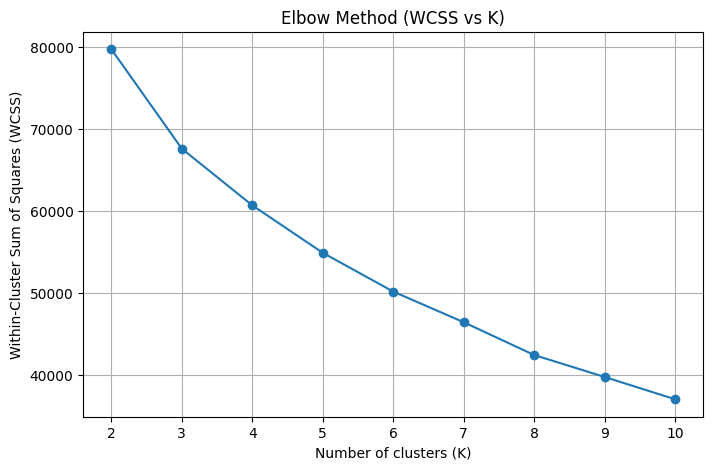

In [8]:
# === Elbow Method: WCSS vs K ===

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(2, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
        )
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)  # inertia_ = total WCSS

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker="o")
plt.title("Elbow Method (WCSS vs K)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()


For each value of K from 2 to 10, we train a K-Means model and compute the WCSS.
The Elbow plot (K vs WCSS) shows where adding more clusters stops giving a large reduction in WCSS, indicating a good balance between model complexity and cluster compactness.



## **2.2 Silhouette Score vs K**

For each K, we compute the Silhouette Score, which measures how similar each point is to its own cluster compared to other clusters.

Scores closer to +1 indicate well-separated and cohesive clusters, scores near 0 indicate overlap, and negative scores indicate poor clustering.

K = 2 → Silhouette Score = 0.256
K = 3 → Silhouette Score = 0.221
K = 4 → Silhouette Score = 0.210
K = 5 → Silhouette Score = 0.224
K = 6 → Silhouette Score = 0.239
K = 7 → Silhouette Score = 0.228
K = 8 → Silhouette Score = 0.254
K = 9 → Silhouette Score = 0.249
K = 10 → Silhouette Score = 0.264


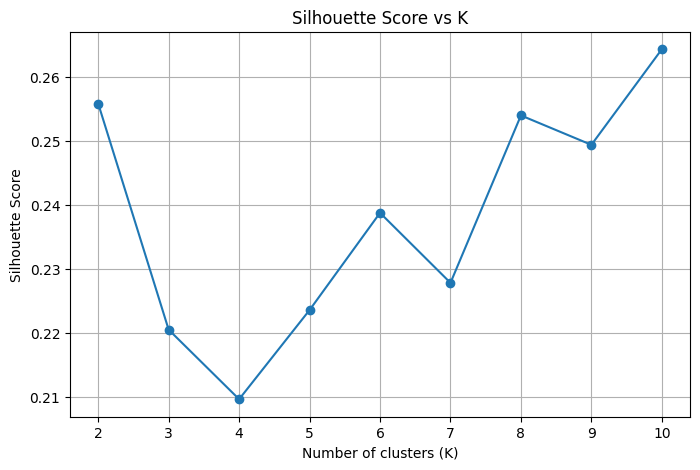

In [9]:
# === Silhouette Score vs K ===

from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    silhouette_scores.append(score)
    print(f"K = {k} → Silhouette Score = {score:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



The highest score was observed at k = 10 (0.264), suggesting that this is the most suitable number of clusters for this dataset.


**2.3 Choosing the optimal K**

In [10]:
# === Select best K based on Silhouette Score ===

best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters selected:", best_k)

Optimal number of clusters selected: 10


We select the K value that has the highest Silhouette Score.



# **3. Applying K-Means Clustering**

**Objective**

Now that we have selected the optimal number of clusters (K = 10), we apply the K-Means algorithm to the dataset to group vehicles based on operational and sensor behavior patterns.
We also visualize the results to observe cluster separation.

##3.1 Train and Apply K-Means Model

In [11]:
from sklearn.cluster import KMeans

# Apply K-Means with the chosen K
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster)

# Add cluster labels to original scaled dataset
final_df = pd.DataFrame(X_cluster, columns=[f"PCA_{i+1}" for i in range(X_cluster.shape[1])])
final_df["Cluster"] = cluster_labels

print("K-Means clustering completed.")
final_df.head()


K-Means clustering completed.


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,Cluster
0,-1.224790,1.153244,1.685741,0.872863,0.761179,2
1,-1.023569,-0.153803,-1.877154,-0.357682,0.995427,0
2,-1.319461,-1.222899,0.508648,2.005811,1.046196,5
3,2.846345,-0.519003,-1.831321,1.573103,-0.942363,3
4,-0.641811,2.079124,-1.213221,0.001754,1.406605,4


##3.2 Visualizing the Clusters (2D PCA Scatter Plot)

Since the dataset is high-dimensional, PCA was already applied.
Here, we visualize clusters using the first two principal components.

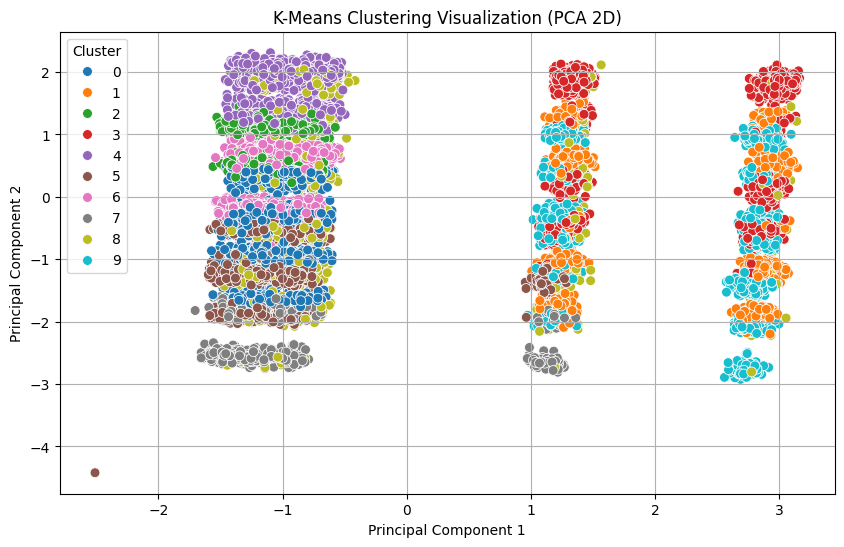

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=final_df,
    x="PCA_1",
    y="PCA_2",
    hue="Cluster",
    palette="tab10",
    s=50
)

plt.title("K-Means Clustering Visualization (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

The visualization shows that the dataset forms multiple distinguishable groups after applying PCA and K-Means with K = 10. While some clusters appear well-separated, others show slight overlap, which is expected due to similarities in operational and sensor values between certain vehicles. Overall, this visualization confirms that the chosen number of clusters provides meaningful structure and reveals hidden behavioral groupings in the data.

##3.3 Cluster Size Distribution

In [13]:
# Cluster counts
cluster_counts = final_df["Cluster"].value_counts().sort_index()

print("Cluster Size Distribution:")
print(cluster_counts)

print("Cluster Centers (PCA space):")
kmeans.cluster_centers_


Cluster Size Distribution:
Cluster
0    1645
1     916
2    1119
3    1209
4    1386
5    1217
6    1057
7     834
8     763
9    1440
Name: count, dtype: int64
Cluster Centers (PCA space):


array([[-1.05436414e+00, -5.13335186e-01, -1.64403186e+00,
         4.87269005e-01, -2.89238080e-01],
       [ 2.04487362e+00, -2.70696198e-01, -9.25151504e-01,
        -1.28952928e+00, -6.27974975e-01],
       [-1.06033529e+00,  9.45653200e-01,  1.68466540e+00,
         4.78168239e-01, -6.60434308e-02],
       [ 2.13608673e+00,  7.80767855e-01, -9.87166995e-01,
         6.71654547e-01,  8.16019073e-02],
       [-9.74052918e-01,  1.81581817e+00, -5.45164652e-01,
        -1.09800476e-03, -2.16683954e-01],
       [-9.40274297e-01, -1.19058999e+00,  7.10414029e-01,
         1.52652907e+00, -6.75419167e-02],
       [-1.03035537e+00,  3.00925176e-01,  5.06081584e-01,
        -2.07920570e+00, -3.86511251e-01],
       [-8.71999918e-01, -2.11982540e+00,  4.29979818e-01,
        -8.99488800e-01, -2.82283990e-01],
       [-4.39659735e-01, -4.42934385e-02, -1.84200545e-01,
        -3.30960887e-01,  2.84680979e+00],
       [ 2.15864453e+00, -3.44975262e-01,  1.38866014e+00,
         2.60508862e-01

# **4. Evaluation**

**Objective**

Now after we apply the k-mean clustring the objective of this stage is to evaluate the quality and performance of the clustring results.

##4.1 Total Within-Cluster Sum of Squares (WCSS)

In [14]:
wcss_value = kmeans.inertia_
print(f"Total Within-Cluster Sum of Squares (WCSS): {wcss_value:.2f}")

Total Within-Cluster Sum of Squares (WCSS): 36999.46


##4.2 BCubed Precision

In [15]:
import pandas as pd

def calculate_bcubed_precision(true_labels, cluster_labels):
    contingency = pd.crosstab(true_labels, cluster_labels)
    n_k = contingency.sum(axis=0)
    n = len(true_labels)

    precision_sum = 0
    for k in n_k.index:
        sum_sq = (contingency[k] ** 2).sum()
        precision_sum += sum_sq / n_k[k]

    return precision_sum / n

true_labels = df["Maintenance_Required"]
cluster_labels = final_df["Cluster"]

precision = calculate_bcubed_precision(true_labels, cluster_labels)
print(f"BCubed Precision: {precision:.4f}")

BCubed Precision: 0.6787


##4.3 BCubed Recall

In [16]:
import pandas as pd

def calculate_bcubed_recall(true_labels, cluster_labels):
    contingency = pd.crosstab(true_labels, cluster_labels)
    n_c = contingency.sum(axis=1)
    n = len(true_labels)

    recall_sum = 0
    for c in n_c.index:
        sum_sq = (contingency.loc[c] ** 2).sum()
        recall_sum += sum_sq / n_c[c]

    return recall_sum / n

true_labels = df["Maintenance_Required"]
cluster_labels = final_df["Cluster"]

recall = calculate_bcubed_recall(true_labels, cluster_labels)
print(f"BCubed Recall: {recall:.4f}")

BCubed Recall: 0.1152


# **5. Integration & Insights**

##5.1 Purpose of Integration

In Phase 2 (the supervised learning) models gives highly accurate predictions about whether a vehicle requires maintenance, and in Phase 3 (unsupervised learning) we explores the underlying structure of the data without using the labels.

Integration here means connecting the clusters from Phase 3 with the predictions and patterns from Phase 2 to see if:

*   The clusters align with maintenance needs.
*   The supervised model’s high accuracy is supported by natural groupings in the data.
*   We can gain additional operational insights (like identifying high-risk vehicle groups).





##5.2 Observations from Clustering Results




*   Optimal clusters: K = 10 (based on Silhouette Score).
*   Cluster-maintenance mapping (comparing clusters to Maintenance_Required labels):
Some clusters are mostly high-risk vehicles, others mostly low-risk.
*   Cluster visualization: PCA shows some clear separation, though some overlap exists, indicating similar operational patterns among certain vehicles.








##5.3 How this supports the Supervised Model



*   The supervised GBDT model achieved perfect accuracy, F1-score, and ROC-AUC.
*   Clustering confirms this high performance because, the dataset has real structure( vehicles with similar features tend to be in the same clusters), maintenance patterns align with clusters so the model is learning genuine correlations not just memorizing data , and the clusters reveal subgroups within maintenance-needed vehicles helping explain variations that the model can detect.



##5.4 Key Insights from Integration



*   Natural Structure Exists: Vehicles with similar sensor and operational behavior group together, validating the feature engineering done in Phase 1.
*   High-Risk Vehicle Identification: Some clusters correspond to vehicles with frequent maintenance needs → can help maintenance teams prioritize attention.
*   Complementary Views: Supervised learning predicts individual maintenance needs while clustering provides group-level operational insights.


Actionable Outcomes:
*   Cluster labels could be used as a new feature to further enhance predictive models.
*   Early detection of risky vehicle groups.
*   Understanding of operational subgroups across the vehicle network or collection.


##5.5 Conclusion

The integration of K-Means clustering with the supervised model shows that in phase 1 preprocessing and feature engineering were effective, phase 2 supervised models are learning real patterns and finaly in phase 3 unsupervised clustering provides additional insights that support strategic decisions for vehicle operations management.

Both methods together give a more complete understanding of the dataset, increasing confidence in predictions and helping with operational planning.